# Day 3: Making plots and maps

### Day 3 modules includes
1. Cartopy Introduction
2. Cartopy Assignment

### Cartopy download (https://scitools.org.uk/cartopy/docs/latest/installing.html)

1. Before downloading Cartopy, you will need to download conda
2. You will need to download cartopy along with some other packages (it should do it automatically)

In [8]:
# Reading cartopy package
import cartopy.crs as ccrs # you will need this to run cartopy (just like opening a program)

### 1. Plotting maps using cartopy
Reference: https://scitools.org.uk/cartopy/docs/latest/matplotlib/intro.html 

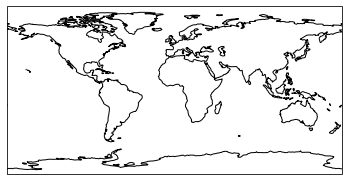

In [41]:
# Make a standard map
import matplotlib.pyplot as plt # import plotting package

fig, axs = plt.subplots() # make a figure

axs = plt.axes(projection=ccrs.PlateCarree()) # set projection for the axes
# PlateCarree is a type of projection, there are many more to explore (https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections)
axs.coastlines() # add in coast lines

plt.show() # close loop

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('coastlines.png') # you can save it as pdf too (just change the .[output])


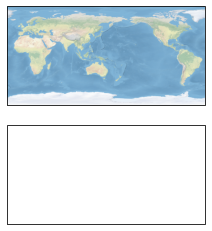

In [63]:
# Try adding in a colored figure to the map (ax.stock_img() ) and centralize the other subplot to anywhere else
# Using subplots

plt.figure(figsize = (8,10)) # make a figure

ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree(150)) # centralized to Australia  (150 degress east)
ax1.stock_img()

ax2 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree()) # centralized to your hometown 
 # add stock image

plt.show()

# Now change the figure size using figsize=(8, 10) # width, height in inches

# and play around with the order of subplot # (row, col, num)


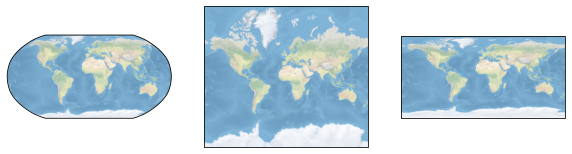

In [57]:
# Comparing different projections

fig = plt.figure(figsize=(10, 10))

ax1 = plt.subplot(1, 3, 1, projection=ccrs.Robinson()) # 
ax1.stock_img()

ax2 = plt.subplot(1, 3, 2, projection=ccrs.Mercator()) # 
ax2.stock_img()

ax3 = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree()) # 
ax3.stock_img()

# What are the differences between these images?

### 2. Adding data in map

IndexError: list index out of range

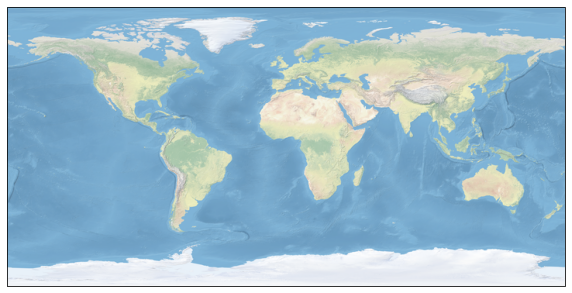

In [59]:
# Let's add the coordinates of Perth, Australia to New York City

fig = plt.figure(figsize=(10, 10)) # make figure

# Enter coordinates here (look up the estimated coordinates)
pe = [] # it can be confusing... lat is Y ,lon is X
ny = []

# Plot here
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# Plotting distance between cities with a line
plt.plot([pe[0], ny[0]], [pe[1], ny[1]],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.PlateCarree(),
         )

# Plotting using a straight line on a sphere using ccrs.Geodetic() (this is the shortest path to travel)
    # change the line properties


# Add texts using plt.text
plt.text(pe - 0, pe - 0, 'Perth',
         transform=ccrs.Geodetic())

plt.text(ny + 3, ny - 12, 'NYC',
         transform=ccrs.Geodetic())

plt.show()

### 3. Defining features (cartopy.feature) on map

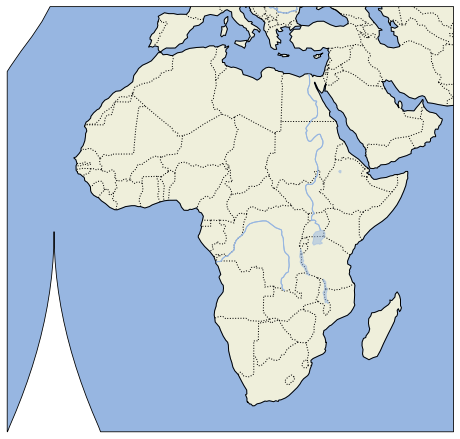

In [65]:
# Using cartopy.feature
import cartopy.feature as cfeature

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.InterruptedGoodeHomolosine()) # try different projections on figure
ax.set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.RIVERS)


In [ ]:
# Now using the cartopy.feature to make a map of USA with state borders and try different projections

# Make a point to show where is your hometown (in the USA or outside)

# Lastly, save the figure
plt.savefig('myhome.png')

#### Optional
Plot 9 different map (subplots) projections 

### 4. Making vectors

We will be plotting GPS vectors in the next module

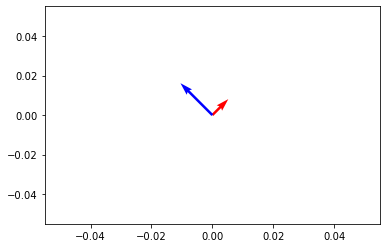

In [5]:
# Simple plot using quiver
# Plot 3 different arrows from 0,0 coordinates

import numpy as np
import matplotlib.pyplot as plt

# Make an array using np.array of [X,Y] direction
V = np.array([[1,1], [-2,2]])

# Set the origin of the arrow (where the arrow branches out)
origin = np.array([[0,0], [0,0]]) # origin points

# quiver(X,Y,E,N) (negative east = west; negative north = south)
plt.quiver(origin[0], origin[1], V[:,0], V[:,1], color=['r','b'], scale=21)

plt.show()

# add one or more arrows that points to different directions with different lengths


### 4. Reading GPS data of the 2019 Ridgecrest, CA earthquake
#### We will be using processed GPS data from the [Nevada Geodetic Labarotary](http://geodesy.unr.edu/index.php)

In [22]:
# Import image tiles (for plotting basemap)
import cartopy.io.img_tiles as cimgt 
# Import pandas to read data
import pandas as pd

# Load GPS data and give variables to X,Y,E,N,U
Data = pd.read_csv('GPS_Ridgecrest.csv')

# print the data to see the formatting
print(Data)

# Now define X,Y,E,N to variables
X = pd.read_csv('GPS_Ridgecrest.csv', skipinitialspace=True, usecols=["X"]); # longitude 
Y = pd.read_csv('GPS_Ridgecrest.csv', skipinitialspace=True, usecols=["X"]); # latitude 


          X       Y         E         N  A  B    C
0  -117.403  35.698  76.32944 -25.00048  1  1  0.5
1  -117.192  35.621  27.09510  -2.69152  1  1  0.5
2  -117.671  35.565 -10.28675  21.20006  1  1  0.5
3  -117.390  35.897   8.21706 -14.64271  1  1  0.5
4  -118.074  35.878 -11.92688   1.30198  1  1  0.5
..      ...     ...       ...       ... .. ..  ...
95 -116.336  34.829   0.33982  -0.06489  1  1  0.5
96 -118.984  35.011  -0.33979   0.02939  1  1  0.5
97 -116.430  34.755   0.18535   0.27998  1  1  0.5
98 -116.625  34.644  -0.27807  -0.03309  1  1  0.5
99 -118.669  34.695  -0.24716  -0.06484  1  1  0.5

[100 rows x 7 columns]


In [23]:
# Define a function for quiver data

def quiverData(X, Y, E, N): # input
    import cartopy.crs as ccrs
    import numpy as np
    """
    Function for converting input data to arrays (Quiver requires arrays).
    
    Returns numpy arrays of your input data and the platecarree CRS.
    """
    crs = ccrs.PlateCarree() # this is the projection
    x = np.asarray(X)
    y = np.asarray(Y)
    u = np.asarray(E)
    v = np.asarray(N)
    return x, y, u, v, crs # output


NameError: name 'stamen_terrain' is not defined

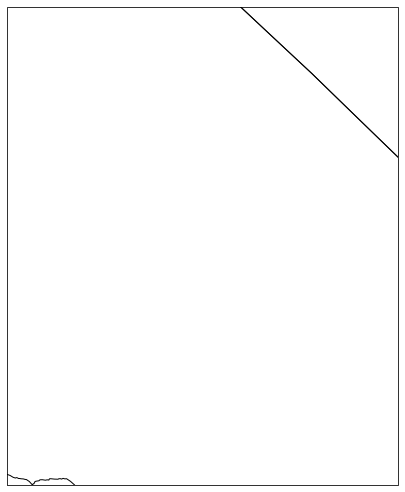

In [51]:
## Creating a basic vector plot using "quiver"

# Make a basemap of the area (in Southern California) 
fig = plt.figure(figsize = (7,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) # define projection
ax = plt.axes(projection=ccrs.Mercator()) # define projection

ax.add_feature(cfeature.STATES, linestyle='-') # put in statelines
ax.set_extent([-119, -116, 37, 34], crs=ccrs.PlateCarree()) # extent you want to show on the map (try different values)
ax.add_image(stamen_terrain,8) # what happens if you change the number?
ax.coastlines() # add coastlines 


## Beautify the map  
# Add grid lines (with the labels)
gl = ax.gridlines() # Add gridlines and labels


# Add the epicenter of the 7.1 magnitude earthquake using ax.Scatter
# make edgecolors to red; color to yellow
epicenter = [-117.605,35.766]
ax.scatter(x,y, transform=ccrs.PlateCarree(), marker='*', c='yellow', edgecolors='red', s=300.0, linewidths=1.0, label='Chignik Earthquake')

# Make the figure clearer
# - change the headwidth size, colors
# - figure labels, title, legend (upper left)

# Save figure
